Referenced from
https://www.pyimagesearch.com/2017/07/17/credit-card-ocr-with-opencv-and-python/


In [5]:
# import the necessary packages
import numpy as np
import argparse
import imutils
from imutils import contours
import cv2
import matplotlib.pyplot as plt

In [ ]:
# define a dictionary that maps the first digit of a credit card
# number to the credit card type
FIRST_NUMBER = {
    "3": "American Express",
    "4": "Visa",
    "5": "MasterCard",
    "6": "Discover Card"
}

(<matplotlib.axes._subplots.AxesSubplot at 0x122b60518>,
 <matplotlib.image.AxesImage at 0x12354f2e8>)

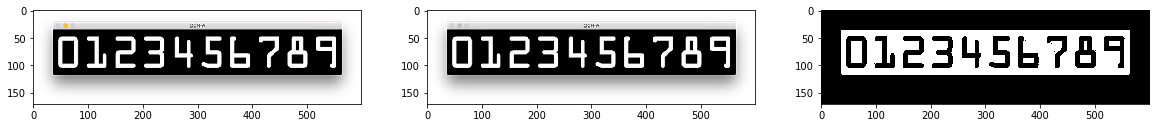

In [18]:
# load the reference OCR-A image from disk, convert it to grayscale,
# and threshold it, such that the digits appear as *white* on a
# *black* background
# and invert it, such that the digits appear as *white* on a *black*
ref = cv2.imread("./res/font.jpg")
ref_gray = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
ref_threshold = cv2.threshold(ref_gray, 10, 255, cv2.THRESH_BINARY_INV)[1]

plt.figure(figsize=(20,5))
plt.subplot(1,3,1), plt.imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2), plt.imshow(cv2.cvtColor(ref_gray, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3), plt.imshow(cv2.cvtColor(ref_threshold, cv2.COLOR_BGR2RGB))

In [22]:
# find contours in the OCR-A image (i.e,. the outlines of the digits)
# sort them from left to right, and initialize a dictionary to map
# digit name to the ROI
refCnts = cv2.findContours(ref_threshold.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
refCnts = imutils.grab_contours(refCnts)
refCnts = contours.sort_contours(refCnts, method="left-to-right")[0]
digits = {}


# loop over the OCR-A reference contours
for (i, c) in enumerate(refCnts):
    # compute the bounding box for the digit, extract it, and resize
    # it to a fixed size
    (x, y, w, h) = cv2.boundingRect(c)
    roi = ref[y:y + h, x:x + w]
    roi = cv2.resize(roi, (57, 88))

    # update the digits dictionary, mapping the digit name to the ROI
    digits[i] = roi

In [23]:
print(digits)

{0: array([[[4, 1, 3],
        [4, 1, 3],
        [2, 0, 1],
        ...,
        [4, 1, 3],
        [2, 2, 2],
        [2, 2, 2]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[1, 1, 1],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)}
